In [47]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset source
https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [48]:
DATASET_DIR = r"D:\Final_year\FYP\COVID-19-Detection-Flask-App-based-on-Chest-X-rays-and-CT-Scans-master\data\COVID-19_Radiography_Dataset\covid_19_xray_dataset"

In [49]:
os.listdir(DATASET_DIR)

['covid', 'normal']

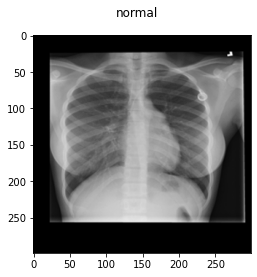

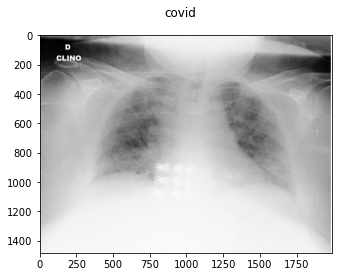

In [51]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [52]:
print(len(normal_images))
print(len(covid_images))

10192
4038


In [53]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 150
BATCH_SIZE = 32

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_24 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)       

In [57]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 9962 images belonging to 2 classes.
Found 4268 images belonging to 2 classes.
Epoch 1/150
311/311 [==============================] - 1045s 3s/step - loss: 0.6328 - accuracy: 0.7191 - val_loss: 0.5391 - val_accuracy: 0.7190
Epoch 2/150
311/311 [==============================] - 963s 3s/step - loss: 0.5400 - accuracy: 0.7244 - val_loss: 0.4562 - val_accuracy: 0.7422
Epoch 3/150
311/311 [==============================] - 1033s 3s/step - loss: 0.4925 - accuracy: 0.7444 - val_loss: 0.3557 - val_accuracy: 0.8421
Epoch 4/150
311/311 [==============================] - 929s 3s/step - loss: 0.4205 - accuracy: 0.8005 - val_loss: 0.3467 - val_accuracy: 0.8628
Epoch 5/150
311/311 [==============================] - 844s 3s/step - loss: 0.3907 - accuracy: 0.8257 - val_loss: 0.3611 - val_accuracy: 0.8463
Epoch 6/150
311/311 [==============================] - 694s 2s/step - loss: 0.3565 - accuracy: 0.8411 - val_loss: 0.2936 - val_accuracy: 0.8776
Epoch 7/150
311/311 [=============================

311/311 [==============================] - 946s 3s/step - loss: 0.2567 - accuracy: 0.9106 - val_loss: 0.2665 - val_accuracy: 0.9077
Epoch 113/150
311/311 [==============================] - 1067s 3s/step - loss: 0.2333 - accuracy: 0.9228 - val_loss: 0.2429 - val_accuracy: 0.9098
Epoch 114/150
311/311 [==============================] - 1226s 4s/step - loss: 0.2641 - accuracy: 0.9192 - val_loss: 0.5184 - val_accuracy: 0.9060
Epoch 115/150
311/311 [==============================] - 1198s 4s/step - loss: 0.2660 - accuracy: 0.9042 - val_loss: 0.2305 - val_accuracy: 0.9145
Epoch 116/150
311/311 [==============================] - 1180s 4s/step - loss: 0.2427 - accuracy: 0.9187 - val_loss: 0.3459 - val_accuracy: 0.9074
Epoch 117/150
311/311 [==============================] - 820s 3s/step - loss: 0.9820 - accuracy: 0.8960 - val_loss: 0.3077 - val_accuracy: 0.9203
Epoch 118/150
311/311 [==============================] - 1052s 3s/step - loss: 0.3041 - accuracy: 0.9033 - val_loss: 0.3968 - val_accu

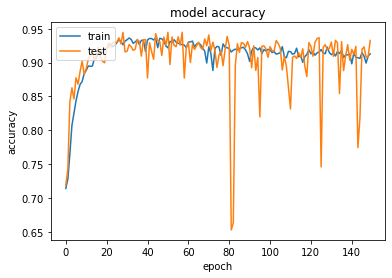

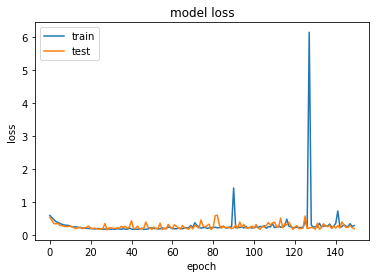

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.912789523601532
validation_accuracy 0.9325658082962036


In [24]:
label = validation_generator.classes

In [60]:
print("training_accuracy", history.history['accuracy'][-1])

training_accuracy 0.912789523601532


In [61]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[130, 151],
       [  0,   0]], dtype=int64)

In [62]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,130,130
1,151,151
All,281,281


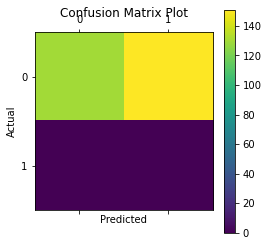

In [28]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [70]:
model.save('covid_xray_model.h5')

In [71]:
from tensorflow import keras
model = keras.models.load_model('covid_xray_model.h5')

In [94]:
import cv2

In [100]:
image = cv2.imread(r'C:\Users\Dell\Python Works\FYP Coding demo\chest-xray-part\data\chest\Chest_NonCOVID\0a29f841-b738-499a-bc8e-0589de77ef82.jpg') # read file 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
image = cv2.resize(image,(150,150))
image = np.array(image) / 255
image = np.expand_dims(image, axis=0)
   

In [105]:
model_pred = model.predict(image)
probability = model_pred[0]
print("Model Predictions:")
if probability[0] > 0.5:
    chest_pred = str('%.2f' % (probability[0]*100) + '% NonCOVID') 
else:
    chest_pred = str('%.2f' % ((1-probability[0])*100) + '% COVID')
print(chest_pred)


Model Predictions:
98.73% NonCOVID
